# Trantando Dados

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('dados/se_completo.csv')
dataset.head()

,modelo,marca,combustivel,cambio,direcao,cor,ano,quilometragem,potenciamotor,blindado,valor
0,2,40,4,2,2,9,2016,98567,1.0,0,25000
1,2,40,4,2,2,9,2016,80000,1.0,0,27000
2,6,34,5,0,2,0,2015,190000,3.0,0,110000
3,6,34,5,0,2,7,2015,110000,3.0,0,110000
4,6,34,5,0,2,9,2015,167000,3.0,0,110000


In [8]:
import seaborn as sns

<AxesSubplot:>

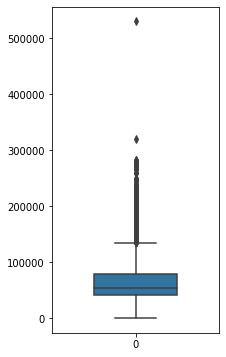

In [20]:
plt.figure(figsize=(3,6))
sns.boxplot(data=dataset['valor'], width=0.5)

In [22]:
modelos = dataset.groupby('modelo')['valor']
q1 = modelos.quantile(.25)
q3 = modelos.quantile(.75)
IIQ = q3 - q1
limite_inferior = q1 - 1.5 * IIQ
limite_superior = q3 + 1.5 * IIQ

<AxesSubplot:title={'center':'valor'}, xlabel='[modelo]'>

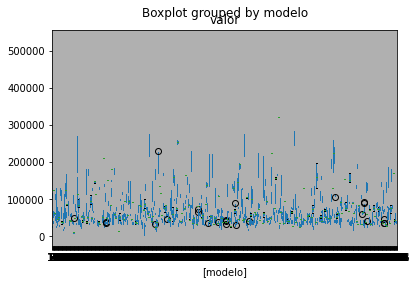

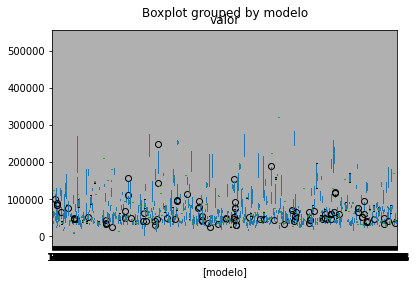

In [23]:
dados_new = pd.DataFrame()

for tipo in modelos.groups.keys():
    eh_tipo = dataset['modelo'] == tipo
    eh_dentro_limite = (dataset['valor'] >= limite_inferior[tipo]) & (dataset['valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dataset[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])
    
dados_new.boxplot(['valor'], by=['modelo'])
dataset.boxplot(['valor'], by=['modelo'])

<AxesSubplot:title={'center':'valor'}, xlabel='[modelo]'>

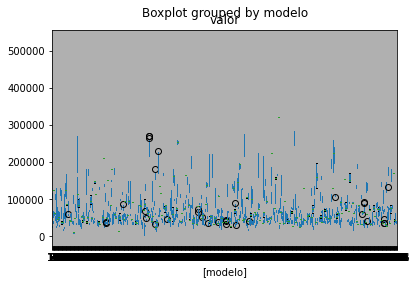

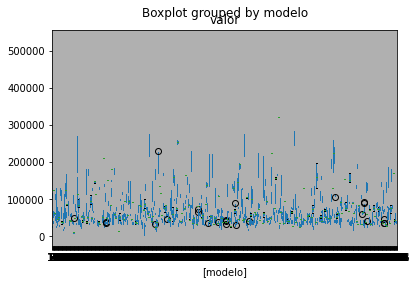

In [24]:
quilometragem = dados_new.groupby('modelo')['quilometragem']
q1 = quilometragem.quantile(.25)
q3 = quilometragem.quantile(.75)
IIQ = q3 - q1
limite_inferior = q1 - 1.5 * IIQ
limite_superior = q3 + 1.5 * IIQ

quilometragem_new = pd.DataFrame()

for tipo in quilometragem.groups.keys():
    eh_tipo = dados_new['modelo'] == tipo
    eh_dentro_limite = (dados_new['quilometragem'] >= limite_inferior[tipo]) & (dados_new['quilometragem'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados_new[selecao]
    quilometragem_new = pd.concat([quilometragem_new, dados_selecao])
    
quilometragem_new.boxplot(['valor'], by=['modelo'])
dados_new.boxplot(['valor'], by=['modelo'])

<AxesSubplot:title={'center':'quilometragem'}, xlabel='[modelo]'>

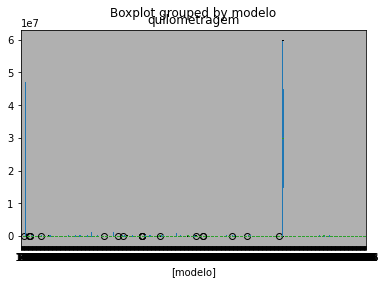

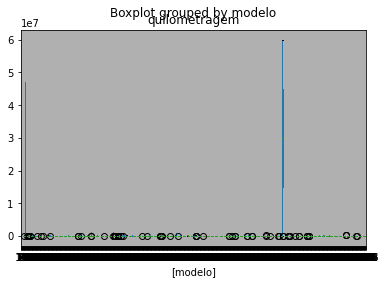

In [25]:
quilometragem_new.boxplot(['quilometragem'], by=['modelo'])
dados_new.boxplot(['quilometragem'], by=['modelo'])

<AxesSubplot:>

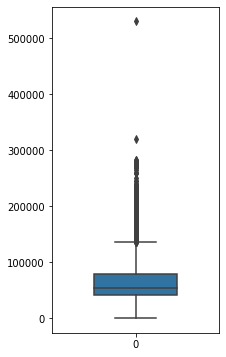

In [33]:
query = quilometragem_new.query("modelo==1114")
plt.figure(figsize=(3,6))
sns.boxplot(data=query['valor'], width=0.5)

In [ ]:
quilometragem_new.to_csv('carros_sem_outliers.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    modelo  counts
0     4159     537
1     4095     454
2      983     401
3     1621     362
4     2451     309
5     1354     208
6     3194     197
7     2406     195
8     2470     187
9     1090     179
10    2721     176
11    1238     175
12    2032     166
13    1272     165
14    1057     164
15     387     153


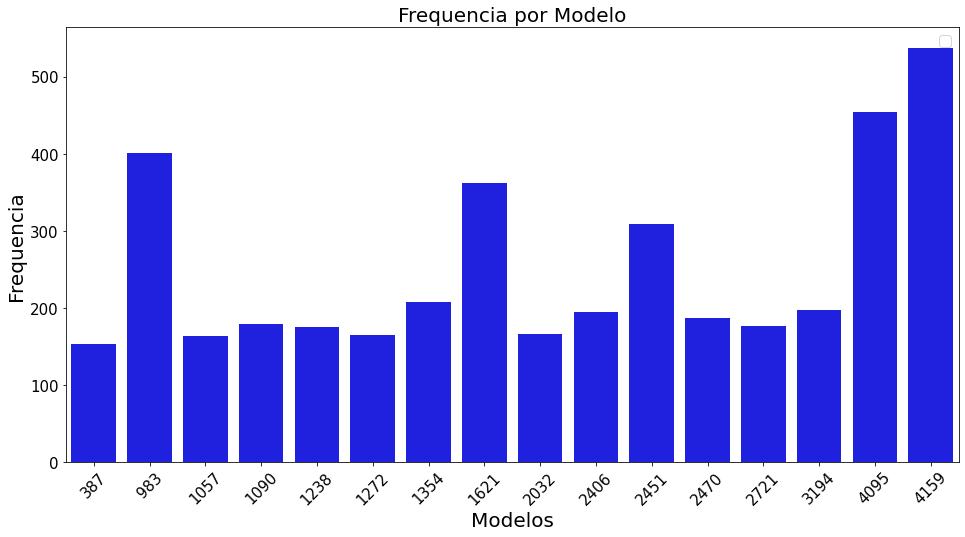

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dados = pd.read_csv('dados/sp_completo.csv')
dados.head()

plot = pd.DataFrame(dados.modelo.value_counts().rename_axis(
    'modelo').reset_index(name='counts'))

plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.barplot(data=plot.query("counts > 150"),
            x='modelo', y="counts", color="blue")
plt.xticks(rotation=45)
plt.xlabel('Modelos', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Frequencia por Modelo', fontsize=20)
plt.legend()


In [29]:
group_model = dados.groupby('modelo')
df_models = []
for modelo, data in group_model:    
    df_models.append(pd.DataFrame(data))

In [30]:
temp = []
for i in range(len(df_models)):
    df = df_models[i]
    temp.append(df.shape[0])

temp = np.asarray(temp)

In [31]:
for i in range(len(temp)):    
    if temp[i]>100 and temp[i] < 200:
        print(i, " - ", temp[i])

457  -  114


In [32]:
df_models[457].modelo.drop_duplicates()

2603    1114
Name: modelo, dtype: int64

In [12]:
df_models[481].to_csv('ford_sp.csv', index=False)
# df_models[457].to_csv('onix_se.csv', index=False)